# ML Notebook Testing 
we will be using - Experimental data used to create regression models of appliances energy use in a low energy building using Tensorflow

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

2025-09-23 11:34:05.348097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-23 11:34:05.616189: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-23 11:34:05.618167: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-23 11:34:06.075279: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-23 11:34:08.274869: W tensorflow/com

In [3]:
# reading the energy dataset 
engdata = pd.read_csv("energydata_complete.csv") 
engdata

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
engdata.columns


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [4]:
engdata.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [9]:
#Extract additional features 
#Extract features
df = engdata.copy()
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Now extract time-based features
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek   # Monday=0, Sunday=6
df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour

In [45]:
df.dtypes

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
day              int32
day_of_week      int32
month            int32
hour             int32
dtype: object

In [ ]:
cols=list(df.select_dtypes(include=np.number).columns)
cols
['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility']

# UNIVARIATE ANALYSIS

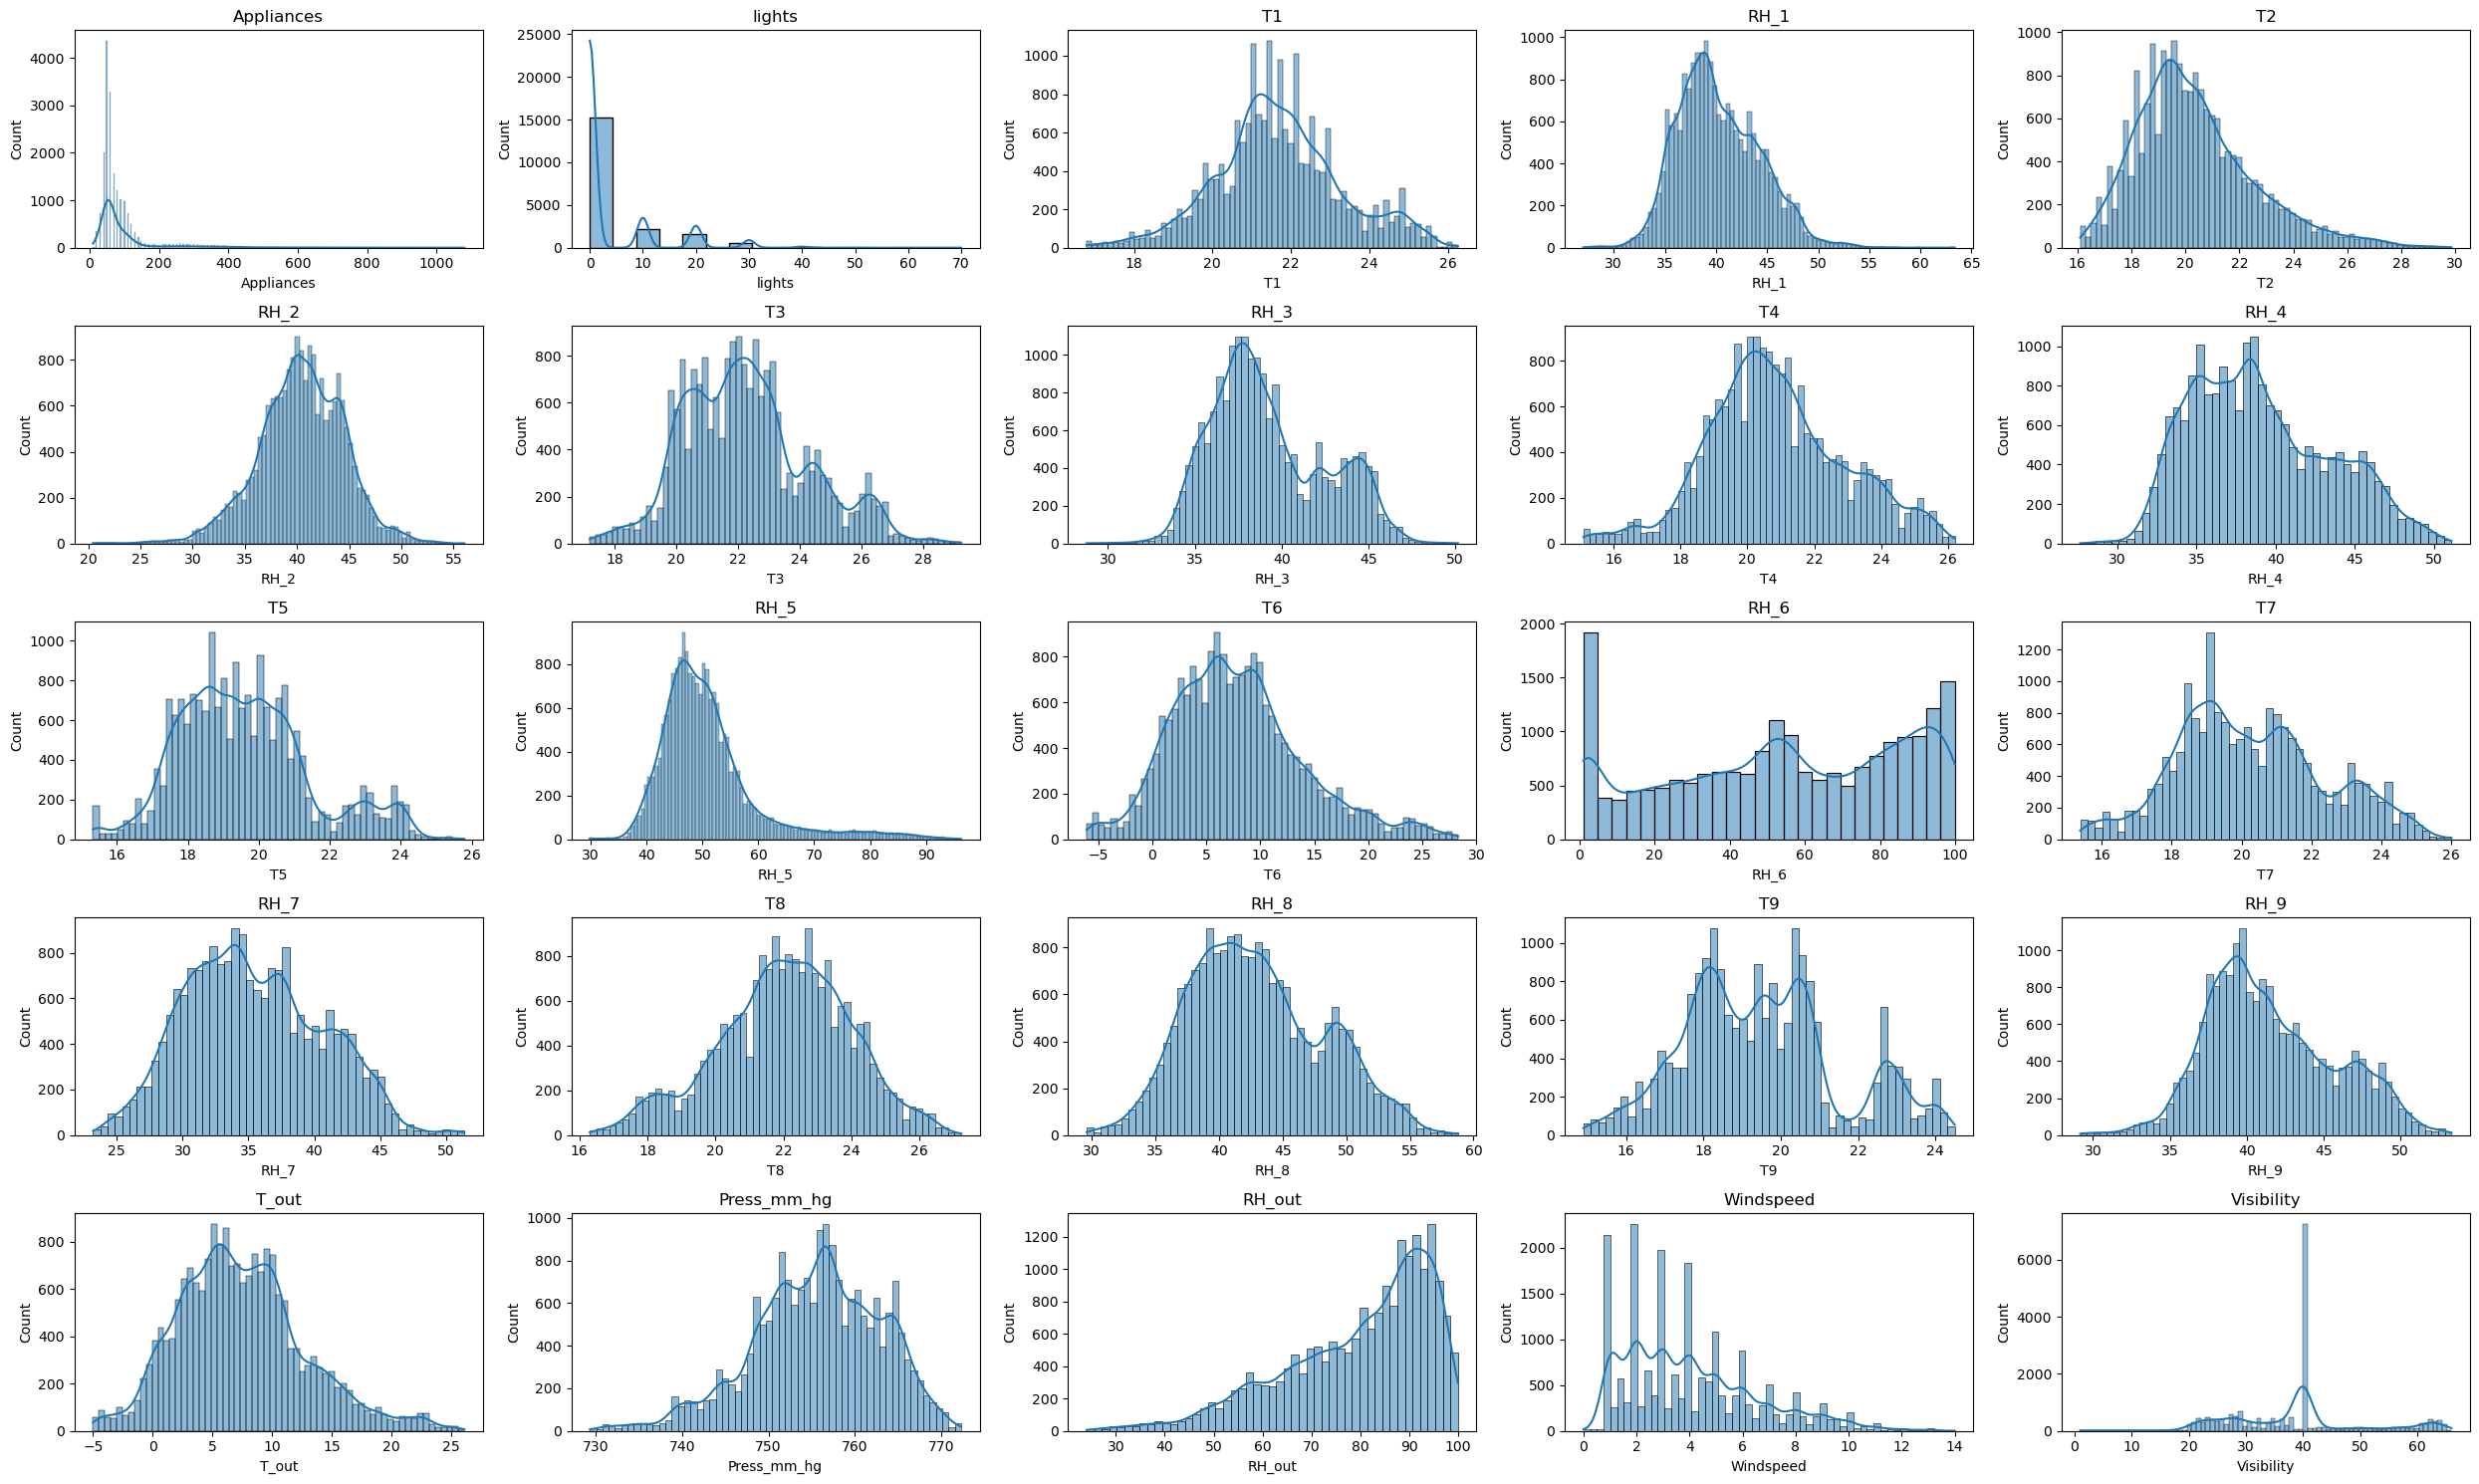

In [24]:
# univariate analysis
import warnings
warnings.filterwarnings('ignore')  # suppress warnings

import matplotlib.pyplot as plt
import seaborn as sns

cols = df.columns  

fig, ax = plt.subplots(5, 5, figsize=(25, 15))
for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df[i], kde=True, ax=subplot)  
    subplot.set_title(i)

plt.tight_layout()
plt.show()

# MULTIVARIATE ANALYSIS

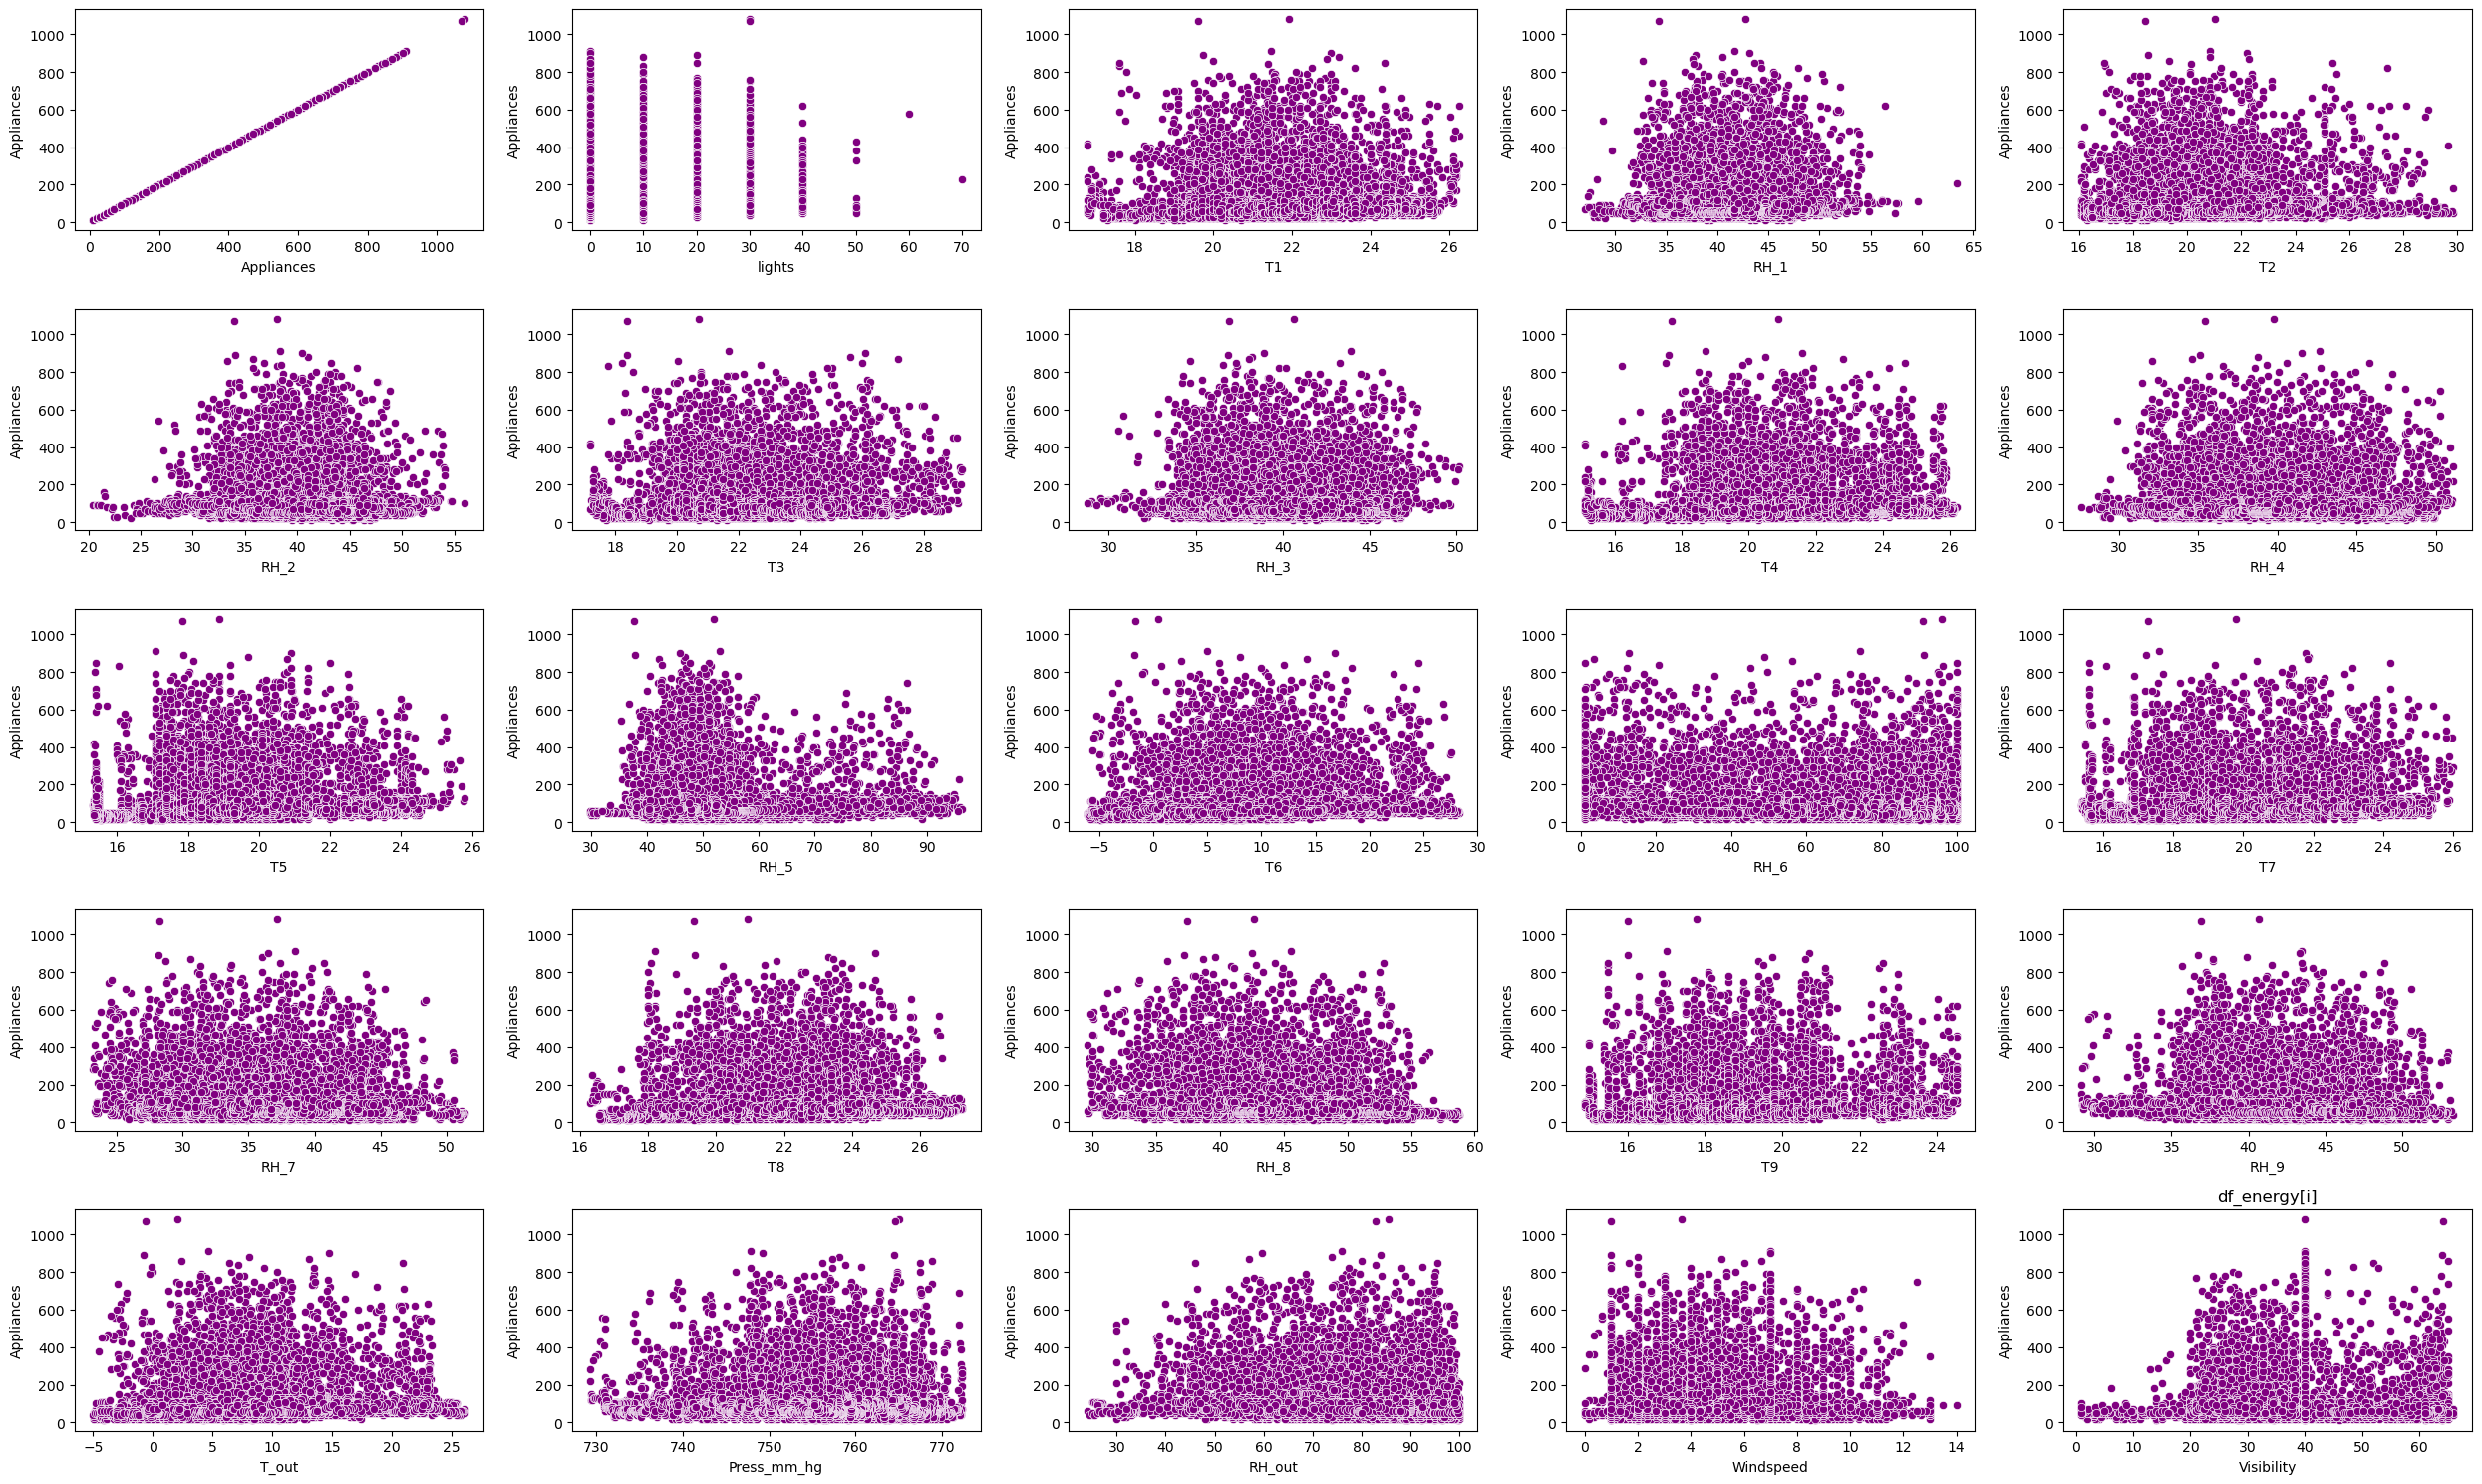

In [25]:
fig, ax= plt.subplots(5,5, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(x=df[i],y=df['Appliances'], ax=subplot,color='purple')
    plt.title('df_energy[i]')

plt.tight_layout()
plt.show()

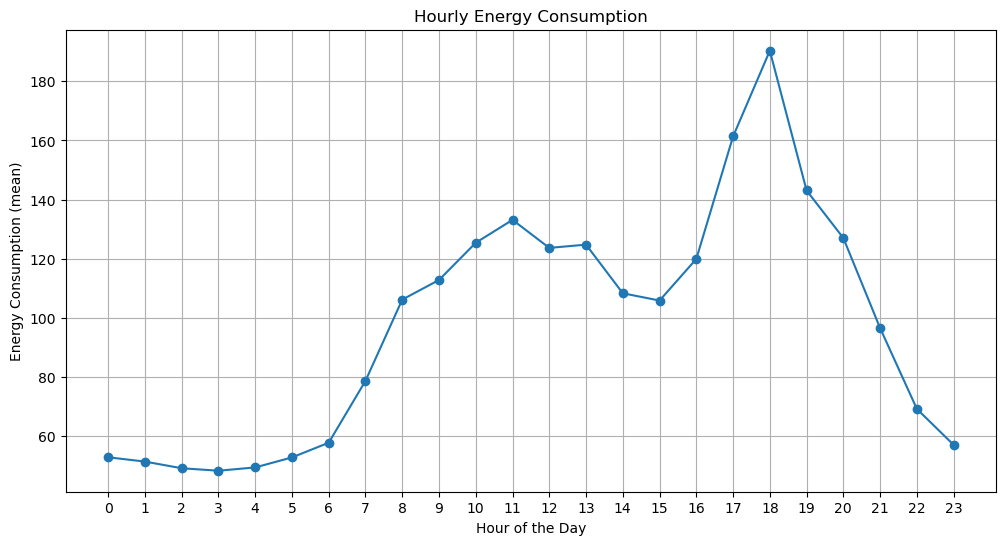

In [50]:
hourly_avg_energy = df.groupby('hour')['Appliances'].mean()
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg_energy.index, hourly_avg_energy.values, marker='o', linestyle='-')
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (mean)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

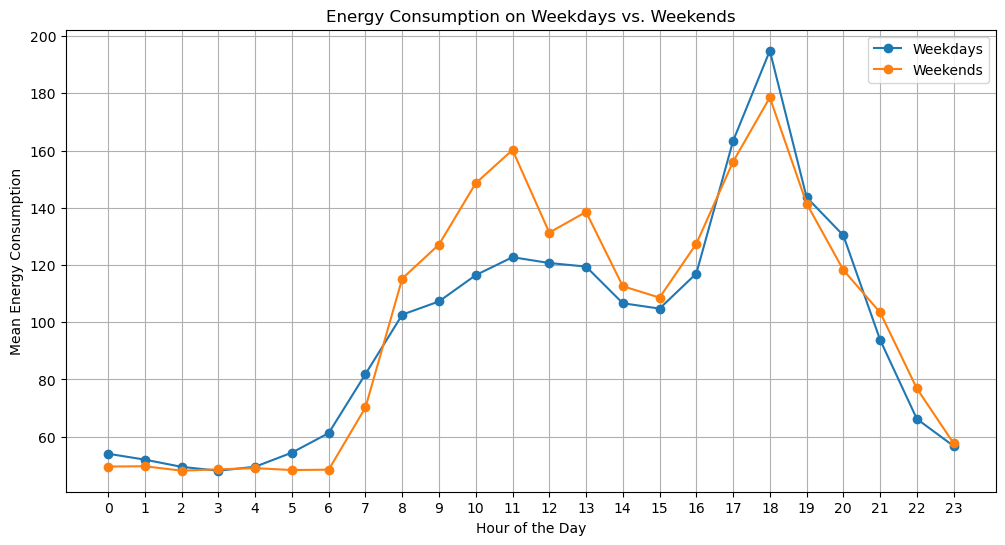

In [52]:
plt.figure(figsize=(12, 6))

# Group the data by 'weekday' and calculate the mean energy consumption for weekdays and weekends
hourly_weekday_energy = df[df['day_of_week'] < 5].groupby('hour')['Appliances'].mean()
hourly_weekend_energy = df[df['day_of_week'] >= 5].groupby('hour')['Appliances'].mean()

# Plot energy consumption for weekdays and weekends
plt.plot(hourly_weekday_energy.index, hourly_weekday_energy.values, label='Weekdays', marker='o')
plt.plot(hourly_weekend_energy.index, hourly_weekend_energy.values, label='Weekends', marker='o')

plt.title('Energy Consumption on Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Energy Consumption')
plt.xticks(range(24))
plt.grid(True)
plt.legend()

plt.show()

# log transformation to fix the skewness

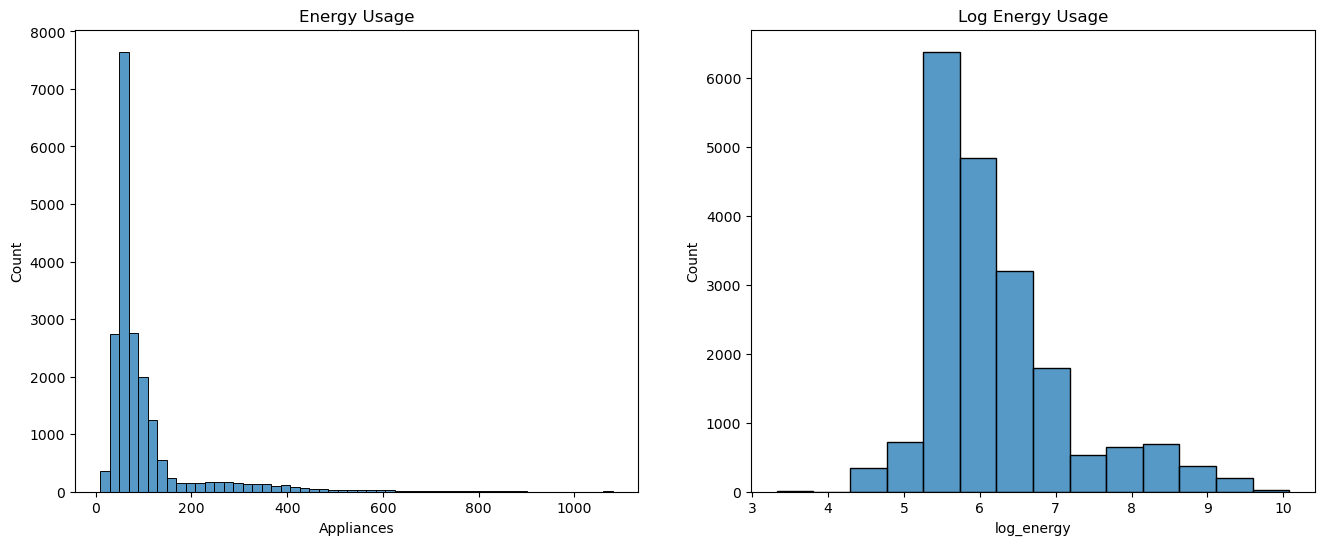

In [53]:
# log2 is chosen as the value range is small
df['log_energy'] = df['Appliances'].apply(lambda x: np.log2(x))

# plot to examine the difference after transformation
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.histplot(x='Appliances', data=df, binwidth=20, ax=ax[0])
sns.histplot(x='log_energy', data=df, binwidth=0.5, ax=ax[1])

ax[0].set_title('Energy Usage')
ax[1].set_title('Log Energy Usage')

plt.show()

In [56]:
df["log_energy"].describe()

count    19735.000000
mean         6.208937
std          0.946851
min          3.321928
25%          5.643856
50%          5.906891
75%          6.643856
max         10.076816
Name: log_energy, dtype: float64

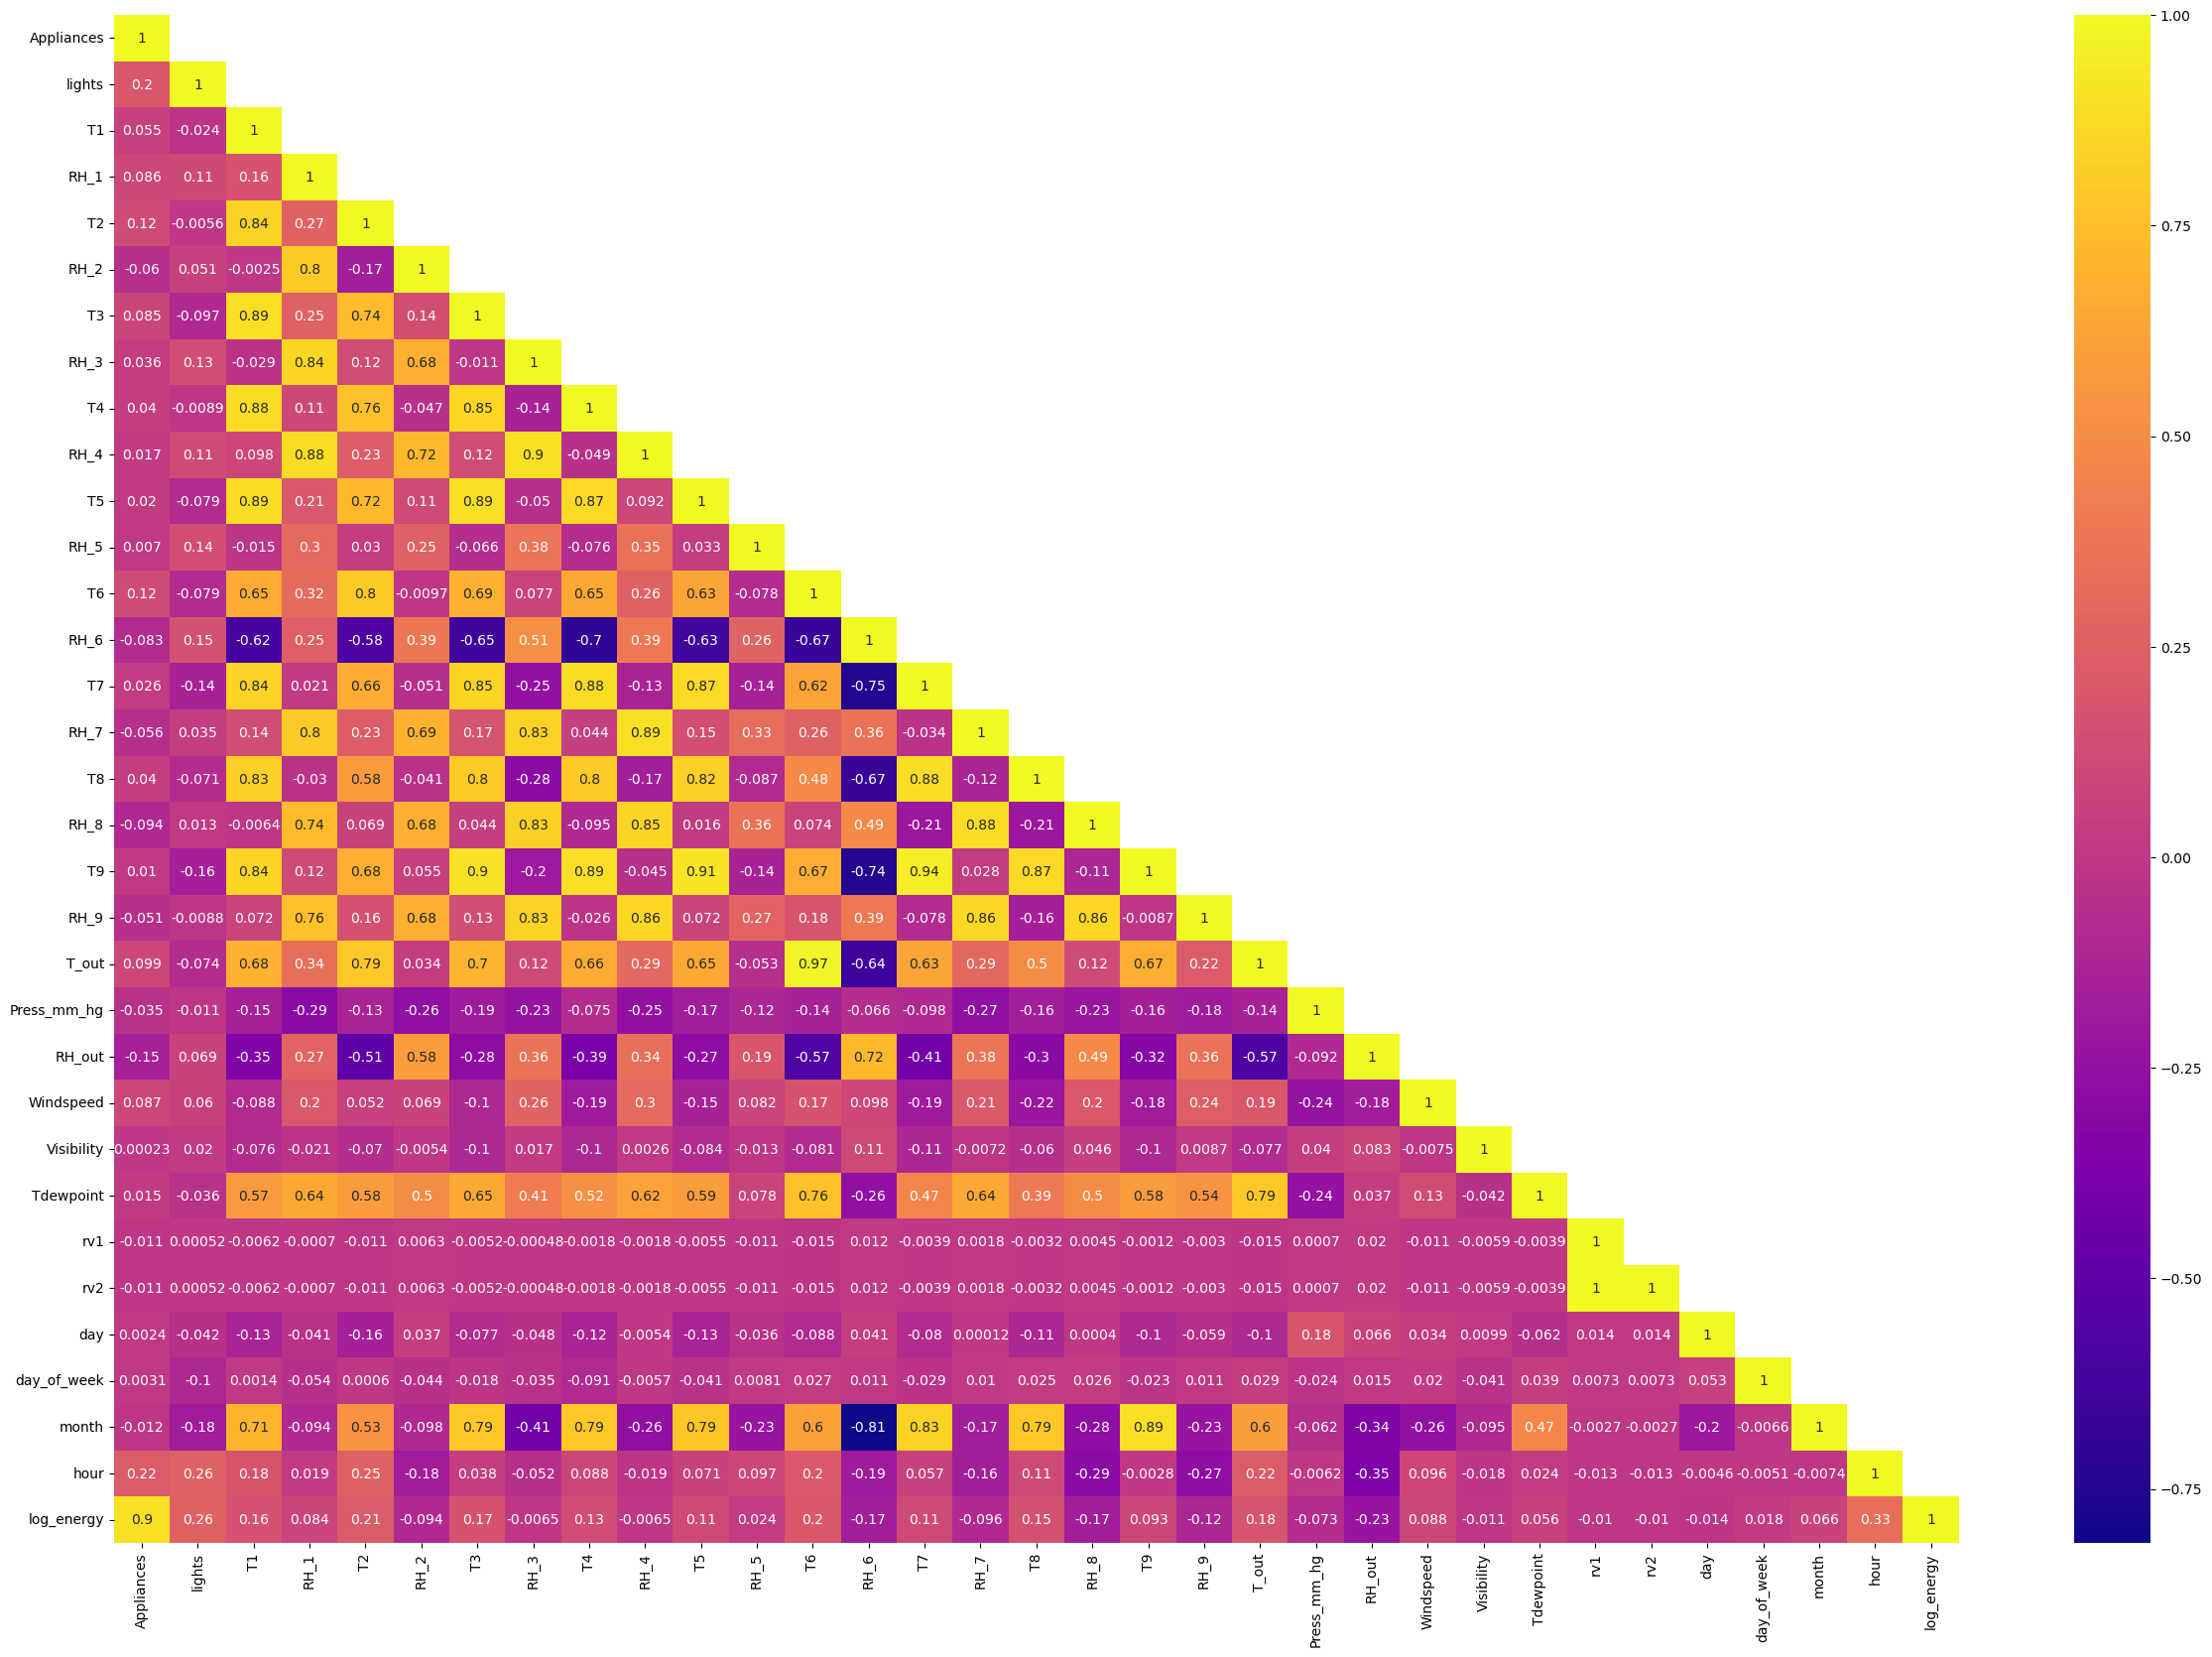

In [57]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap='plasma',mask=np.triu(df.corr(),+1))
plt.show()

In [61]:
#removing outliers:
def remove_outliers(df, target_cols):
    df_clean = df.copy()
    features = df_clean.drop(columns=target_cols)
    for col in features.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_cleaned = remove_outliers(df, target_cols=['Appliances', 'log_energy'])
df_cleaned.shape

(10941, 33)

In [66]:
df_cleaned

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,day,day_of_week,month,hour,log_energy
51,50,20.926667,45.590000,20.290,44.290000,20.166667,45.530,21.890000,46.966667,19.000000,...,5.500000,40.000000,3.950000,43.060474,43.060474,12,1,1,1,5.643856
52,40,20.890000,45.666667,20.230,44.290000,20.133333,45.500,21.823333,46.226667,18.926667,...,5.333333,40.000000,3.966667,21.904855,21.904855,12,1,1,1,5.321928
53,50,20.890000,46.060000,20.200,44.400000,20.200000,45.500,21.666667,46.060000,18.890000,...,5.166667,40.000000,3.983333,12.239864,12.239864,12,1,1,1,5.643856
54,40,20.790000,46.200000,20.200,44.466667,20.166667,45.500,21.533333,45.933333,18.890000,...,5.000000,40.000000,4.000000,3.533952,3.533952,12,1,1,2,5.321928
55,50,20.790000,46.200000,20.100,44.530000,20.125000,45.425,21.356667,45.900000,18.890000,...,4.833333,40.000000,3.933333,4.973308,4.973308,12,1,1,2,5.643856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19671,190,23.890000,45.500000,22.390,46.290000,25.730000,39.560,24.230000,42.626667,22.390000,...,1.500000,51.500000,11.700000,37.038056,37.038056,27,4,5,7,7.569856
19672,130,23.963333,45.500000,22.390,46.290000,25.730000,39.700,24.290000,42.700000,22.390000,...,1.666667,52.666667,11.700000,45.659775,45.659775,27,4,5,7,7.022368
19673,180,24.000000,45.500000,22.500,46.400000,25.790000,39.700,24.290000,42.730000,22.390000,...,1.833333,53.833333,11.700000,33.925615,33.925615,27,4,5,7,7.491853
19674,360,24.000000,45.500000,22.470,46.382857,25.700000,39.900,24.290000,42.790000,22.390000,...,2.000000,55.000000,11.700000,32.084907,32.084907,27,4,5,8,8.491853


In [65]:
# remove cnst columns
df_cleaned = df_cleaned.drop(columns=['lights'])

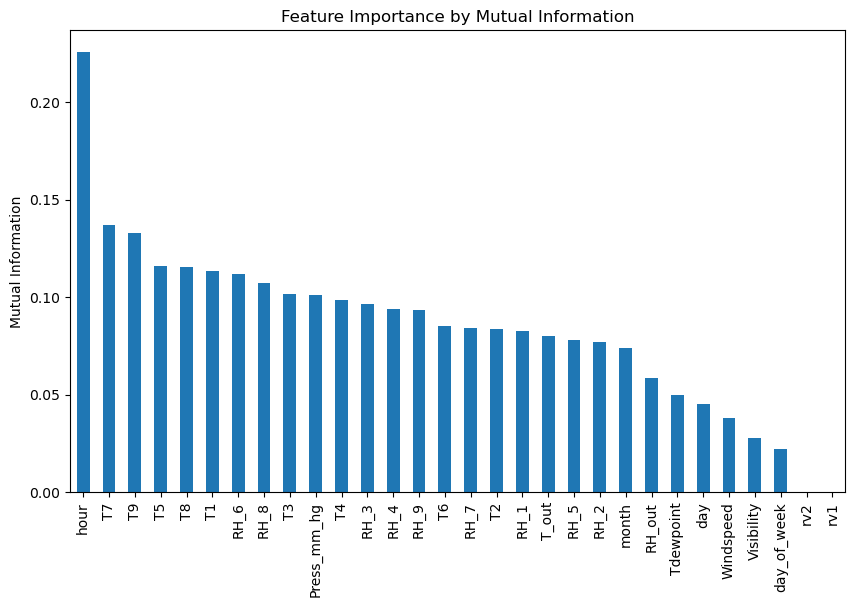

In [71]:
from sklearn.feature_selection import mutual_info_regression

X = df_cleaned.drop(columns=['log_energy', 'Appliances'])
y = df_cleaned['log_energy']

mi = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
mi_scores.plot(kind='bar')
plt.ylabel('Mutual Information')
plt.title('Feature Importance by Mutual Information')
plt.show()


In [ ]:
# remove random variables rv1 and rv2
df_cleaned = df_cleaned.drop(columns=['rv1','rv2', 'Appliances'])
df_cleaned

In [74]:
df_cleaned = df_cleaned.rename(columns={'day': 'day_of_month'}) 
df_cleaned

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day_of_month,day_of_week,month,hour,log_energy
51,20.926667,45.590000,20.290,44.290000,20.166667,45.530,21.890000,46.966667,19.000000,50.030000,...,737.900000,92.000000,5.500000,40.000000,3.950000,12,1,1,1,5.643856
52,20.890000,45.666667,20.230,44.290000,20.133333,45.500,21.823333,46.226667,18.926667,50.090000,...,738.033333,92.000000,5.333333,40.000000,3.966667,12,1,1,1,5.321928
53,20.890000,46.060000,20.200,44.400000,20.200000,45.500,21.666667,46.060000,18.890000,50.090000,...,738.166667,92.000000,5.166667,40.000000,3.983333,12,1,1,1,5.643856
54,20.790000,46.200000,20.200,44.466667,20.166667,45.500,21.533333,45.933333,18.890000,50.172500,...,738.300000,92.000000,5.000000,40.000000,4.000000,12,1,1,2,5.321928
55,20.790000,46.200000,20.100,44.530000,20.125000,45.425,21.356667,45.900000,18.890000,50.200000,...,738.400000,92.000000,4.833333,40.000000,3.933333,12,1,1,2,5.643856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19671,23.890000,45.500000,22.390,46.290000,25.730000,39.560,24.230000,42.626667,22.390000,53.826667,...,755.800000,87.500000,1.500000,51.500000,11.700000,27,4,5,7,7.569856
19672,23.963333,45.500000,22.390,46.290000,25.730000,39.700,24.290000,42.700000,22.390000,53.663333,...,755.800000,87.000000,1.666667,52.666667,11.700000,27,4,5,7,7.022368
19673,24.000000,45.500000,22.500,46.400000,25.790000,39.700,24.290000,42.730000,22.390000,53.530000,...,755.800000,86.500000,1.833333,53.833333,11.700000,27,4,5,7,7.491853
19674,24.000000,45.500000,22.470,46.382857,25.700000,39.900,24.290000,42.790000,22.390000,53.400000,...,755.800000,86.000000,2.000000,55.000000,11.700000,27,4,5,8,8.491853


In [81]:
temp_cols = ['T1','T2','T3','T4','T5','T6','T7','T8','T9']
rh_cols = ['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']

df_cleaned['T_mean'] = df_cleaned[temp_cols].mean(axis=1)
df_cleaned['T_max'] = df_cleaned[temp_cols].max(axis=1)
df_cleaned['T_min'] = df_cleaned[temp_cols].min(axis=1)
df_cleaned['T_std'] = df_cleaned[temp_cols].std(axis=1)

df_cleaned['RH_mean'] = df_cleaned[rh_cols].mean(axis=1)
df_cleaned['RH_max'] = df_cleaned[rh_cols].max(axis=1)
df_cleaned['RH_min'] = df_cleaned[rh_cols].min(axis=1)
df_cleaned['RH_std'] = df_cleaned[rh_cols].std(axis=1)

df_cleaned = df_cleaned.drop(columns=temp_cols + rh_cols)
df_cleaned

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day_of_month,day_of_week,month,hour,log_energy,T_mean,T_max,T_min,T_std,RH_mean,RH_max,RH_min,RH_std
51,5.150000,737.900000,92.000000,5.500000,40.000000,3.950000,12,1,1,1,5.643856,17.901111,21.890000,4.866667,5.123143,52.146667,91.260000,44.290000,14.938521
52,5.166667,738.033333,92.000000,5.333333,40.000000,3.966667,12,1,1,1,5.321928,17.855556,21.823333,4.726667,5.151294,52.176296,91.593333,44.290000,15.079276
53,5.183333,738.166667,92.000000,5.166667,40.000000,3.983333,12,1,1,1,5.643856,17.809259,21.666667,4.466667,5.220544,52.325926,91.760000,44.400000,15.105451
54,5.200000,738.300000,92.000000,5.000000,40.000000,4.000000,12,1,1,2,5.321928,17.757315,21.533333,4.333333,5.239436,52.397963,91.760000,44.466667,15.093015
55,5.133333,738.400000,92.000000,4.833333,40.000000,3.933333,12,1,1,2,5.643856,17.707963,21.356667,4.156667,5.270177,52.446852,91.833333,44.530000,15.116855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19671,13.800000,755.800000,87.500000,1.500000,51.500000,11.700000,27,4,5,7,7.569856,22.787407,25.730000,15.666667,2.870479,44.274339,53.826667,33.590000,5.660545
19672,13.900000,755.800000,87.000000,1.666667,52.666667,11.700000,27,4,5,7,7.022368,22.826963,25.730000,15.933333,2.793196,44.039630,53.663333,31.723333,6.063037
19673,14.000000,755.800000,86.500000,1.833333,53.833333,11.700000,27,4,5,7,7.491853,22.882751,25.790000,16.263333,2.697739,43.804656,53.530000,29.626667,6.591393
19674,14.100000,755.800000,86.000000,2.000000,55.000000,11.700000,27,4,5,8,8.491853,22.902963,25.700000,16.596667,2.582664,43.725503,53.400000,28.700000,6.811533


In [82]:
df_cleaned.columns

Index(['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'day_of_month', 'day_of_week', 'month', 'hour',
       'log_energy', 'T_mean', 'T_max', 'T_min', 'T_std', 'RH_mean', 'RH_max',
       'RH_min', 'RH_std'],
      dtype='object')

In [83]:
# split the data
from sklearn.model_selection import train_test_split 
X = df_cleaned.drop(columns=['log_energy'])
y = df_cleaned['log_energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
X_train.shape

(8205, 18)

In [84]:
y_train

5260     5.906891
16053    5.643856
3598     5.643856
981      5.643856
14831    5.906891
           ...   
11316    6.129283
10518    6.491853
10794    5.906891
2016     4.906891
13423    5.321928
Name: log_energy, Length: 8205, dtype: float64

# autoML -h20

In [85]:
%pip install h2o
import h2o
h2o.init()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 13.0 MB/s  0:00:20m0:00:0100:01
Note: you may need to restart the kernel to use updated packages.
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.28" 2025-07-15 LTS; OpenJDK Runtime Environment Corretto-11.0.28.6.1 (build 11.0.28+6-LTS); OpenJDK 64-Bit Server VM Corretto-11.0.28.6.1 (build 11.0.28+6-LTS, mixed mode)
  Starting server from /home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq2i9w2as
  JVM stdout: /tmp/tmpq2i9w2as/h2o_ec2_user_started_from_python.out
  JVM stderr: /tmp/tmpq2i9w2as/h2o_ec2_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/late

H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 27 days
H2O_cluster_name:,H2O_from_python_ec2_user_1th75r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,964 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [92]:
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test_h2o = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))
from h2o.automl import H2OAutoML
y_col = 'log_energy'
x_cols = train_h2o.columns
x_cols.remove(y_col)

aml = H2OAutoML(max_models=5, seed=42)
aml.train(x=x_cols, y=y_col, training_frame=train_h2o)

leader_model = aml.leader
perf = leader_model.model_performance(test_h2o)

print(perf.r2())
print(perf.rmse())
print(perf.mae())

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
0.683197034154272
0.490494389169109
0.32330166100592106


In [93]:
print(leader_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20250923_163300


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.032388029481168715
RMSE: 0.17996674548696132
MAE: 0.12534330418125314
RMSLE: 0.024682637516387412
Mean Residual Deviance: 0.032388029481168715
R^2: 0.9567681735259754
Null degrees of freedom: 8204

In [90]:
df_cleaned["log_energy"].describe()

count    10941.000000
mean         6.042051
std          0.867126
min          3.321928
25%          5.643856
50%          5.906891
75%          6.321928
max          9.829723
Name: log_energy, dtype: float64

In [94]:
rmse = perf.rmse()
nrmse = rmse / np.mean(y_test)
print("RMSE:", round(rmse, 4))
print("Normalized RMSE:", round(nrmse, 4))

RMSE: 0.4905
Normalized RMSE: 0.0814


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


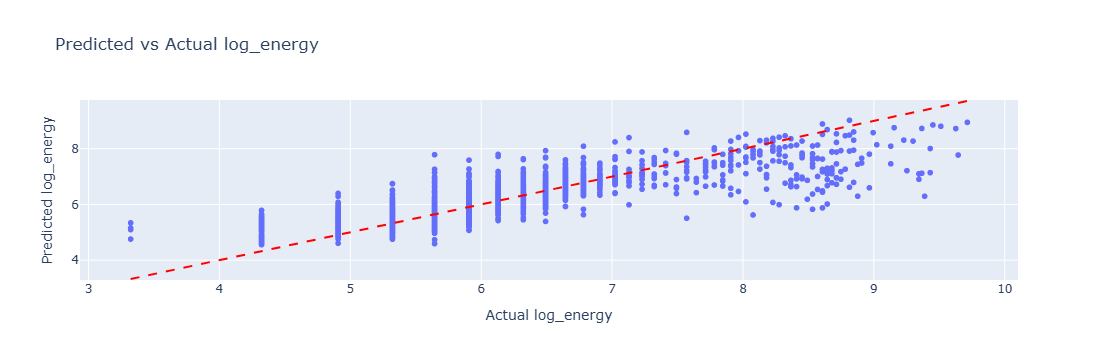

In [95]:
import plotly.express as px

# get predictions on test set
preds = leader_model.predict(test_h2o).as_data_frame().values.flatten()
actuals = y_test.values

df_plot = pd.DataFrame({
    'Actual': actuals,
    'Predicted': preds
})

# scatter plot
fig = px.scatter(df_plot, x='Actual', y='Predicted', 
                 title='Predicted vs Actual log_energy',
                 labels={'Actual':'Actual log_energy', 'Predicted':'Predicted log_energy'})
fig.add_shape(
    type="line", line=dict(dash='dash', color="red"),
    x0=min(actuals), x1=max(actuals), y0=min(actuals), y1=max(actuals)
)
fig.show()


In [105]:
import h2o
from IPython.display import FileLink

# Download MOJO
mojo_path = leader_model.download_mojo(path="models/", get_genmodel_jar=False)

# Display a clickable link
FileLink(mojo_path)



/home/ec2-user/SageMaker/models/StackedEnsemble_AllModels_1_AutoML_2_20250923_163300.zip

In [106]:
#randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
# Initialize Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# K-Fold Cross-Validation on training data
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='r2')

print("CV R² mean:", np.mean(cv_r2_scores))
print("CV R² std:", np.std(cv_r2_scores))

# Fit on full training data
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate on test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R²:", r2)


CV R² mean: 0.6477768744035841
CV R² std: 0.013114247369620774
Test RMSE: 0.49687002090626825
Test R²: 0.6749076290538717


In [107]:
nrmse = rmse / np.mean(y_test)
print("RMSE:", round(rmse, 4))
print("Normalized RMSE:", round(nrmse, 4))

RMSE: 0.4969
Normalized RMSE: 0.0825


In [109]:
# Save the trained model to a pickle file
import pickle
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("rf_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
file_link = FileLink("rf_model.pkl")
file_link

/home/ec2-user/SageMaker/rf_model.pkl